In [61]:
import os
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import pickle
from sklearn.preprocessing import StandardScaler

In [43]:
data = pd.read_csv("../notebooks/dataset.csv", delimiter='|')

In [12]:
numerical = data[['bathrooms', 'bedrooms', 'price', 'square_feet']]

In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical)

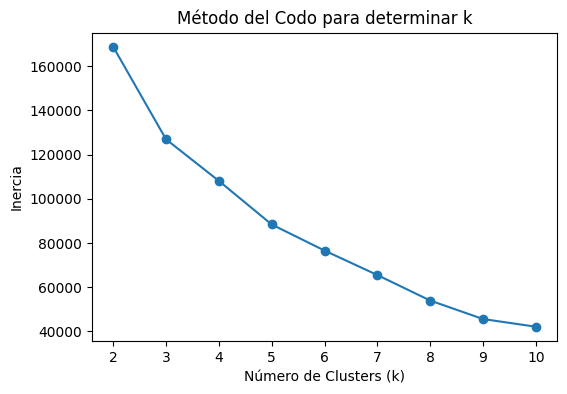

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determinar número óptimo de clusters con el método del codo
inertia = []
K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar k')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar los clusters al dataset
data['cluster'] = clusters


In [47]:
cluster_summary = data.groupby('cluster')[['price', 'bedrooms', 'bathrooms', 'square_feet']].mean()
print(cluster_summary)


                price  bedrooms  bathrooms  square_feet
cluster                                                
0         1326.569573  0.984328   1.006554   722.245719
1         3145.195152  2.145320   1.940135  1204.335084
2         2373.253084  3.674891   2.562674  2226.323120
3         1432.614533  2.213620   2.006504  1138.867363
4        13921.940678  3.728814   3.796610  3541.093220
5         1267.792370  2.107729   1.041738   856.044151


In [27]:
import mlflow

In [40]:
mlflow.set_tracking_uri('http://186.121.46.71:5000/')

In [ ]:
#mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Prediccion_Precios_Inmuebles")

<Experiment: artifact_location='mlflow-artifacts:/467994969493061218', creation_time=1759811682964, experiment_id='467994969493061218', last_update_time=1759811682964, lifecycle_stage='active', name='Prediccion_Precios_Inmuebles', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import mlflow
import mlflow.sklearn

X = data[['bathrooms', 'bedrooms', 'price', 'square_feet']]
X_scaled = StandardScaler().fit_transform(X)


pca = PCA(n_components=2)   # Para visualización en 2D
X_pca = pca.fit_transform(X_scaled)


mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Local
mlflow.set_experiment("Cluster_Camila")

n_clusters = 3  # puedes probar distintos valores

with mlflow.start_run(run_name=f"kmeans_pca_{n_clusters}_clusters"):
    # Entrenar el modelo
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_pca)

    # Predicciones
    labels = kmeans.labels_

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_pca, labels)
    davies = davies_bouldin_score(X_pca, labels)
    calinski = calinski_harabasz_score(X_pca, labels)


    mlflow.log_param("n_clusters", n_clusters)
    mlflow.log_param("n_features_original", X.shape[1])
    mlflow.log_param("n_features_pca", 2)
    
    mlflow.log_metric("inertia", inertia)
    mlflow.log_metric("silhouette_score", silhouette)
    mlflow.log_metric("davies_bouldin", davies)
    mlflow.log_metric("calinski_harabasz", calinski)



2025/10/07 00:43:10 INFO mlflow.tracking.fluent: Experiment with name 'Cluster_Camila' does not exist. Creating a new experiment.


🏃 View run kmeans_pca_3_clusters at: http://127.0.0.1:5000/#/experiments/378312080640238452/runs/0dd5630db4f54e248c8c35acaa6848c8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/378312080640238452


In [25]:
print(mlflow.get_tracking_uri())


file:///Users/camilamillan/Mlopstrabajofinal/Experiment_tracking/mlruns


In [ ]:
mlflow.search_experiments()

[<Experiment: artifact_location='mlflow-artifacts:/378312080640238452', creation_time=1759815790573, experiment_id='378312080640238452', last_update_time=1759815790573, lifecycle_stage='active', name='Cluster_Camila', tags={'mlflow.experimentKind': 'custom_model_development'}>,
 <Experiment: artifact_location='mlflow-artifacts:/216356639863519653', creation_time=1759815574609, experiment_id='216356639863519653', last_update_time=1759815574609, lifecycle_stage='active', name='Clustering_Inmuebles_PCA', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/904870624907446826', creation_time=1759811685161, experiment_id='904870624907446826', last_update_time=1759811685161, lifecycle_stage='active', name='Clustering_Inmuebles', tags={'mlflow.experimentKind': 'custom_model_development'}>,
 <Experiment: artifact_location='mlflow-artifacts:/467994969493061218', creation_time=1759811682964, experiment_id='467994969493061218', last_update_time=1759811682964, lifecycle_stage='active', nam

In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient("http://127.0.0.1:5000")

In [ ]:
client.search_registered_models()

In [ ]:
client.search_runs(experiment_ids='1')[0].info

In [ ]:
run_id = client.search_runs(experiment_ids='1')[0].info.run_id
mlflow.register_model(
    model_uri=f"runs:/{run_id}/models",
    name='iris-classifier'
)